In [7]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from utils import sequential_conv_1d_embedding

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
resnet = torchvision.models.resnet18(pretrained=True)
resnetbasedmodel = nn.Sequential(resnet.conv1,
                                 resnet.bn1,
                                 resnet.relu,
                                 resnet.layer1,
                                 resnet.layer2,
                                 resnet.layer3,
                                 nn.Conv2d(256, 512, 1)
                                 )

In [10]:
embedding_size = 512
encoderRecursiveModel = sequential_conv_1d_embedding(embedding_size, 
                                                    embedding_size,
                                                    3,
                                                    [256],
                                                    [0,1],
                                                    [1,1],
                                                    True,
                                                    True)



In [11]:
embedding_size = 512
decoderRecursiveModel = sequential_conv_1d_embedding(embedding_size, 
                                                    embedding_size,
                                                    3,
                                                    [256],
                                                    [1,1],
                                                    [1,1],
                                                    True)


In [12]:
embedding_size = 512
decoderOutput_Model = sequential_conv_1d_embedding(embedding_size, 
                                                    3,
                                                    3,
                                                    [128, 128, 64],
                                                    [1,1,1,1],
                                                    [1,1,1,1],
                                                    True)


In [13]:
from autoencoder_elements import (LogDecoderRecursiveLayerConvModel_1_embedding,
                                 LogEncoderEntryLayerConvModel_1d_embedding,
                                 LogEncoderRecursiveLayerConvModel_1d_embedding)

In [14]:
class LogAE(nn.Module):
    def __init__(self, encoder_entry, encoder_recursive, decoder_recursive, decoder_output):
        super().__init__()
        self.encoder_entry = encoder_entry
        self.encoder_recursive = encoder_recursive
        self.decoder_recursive = decoder_recursive
        self.decoder_output = decoder_output

    def forward(self, x):
        i = 0 
        x = self.encoder_entry(x)
        while x.shape[-2] != 1 and x.shape[-3] != 1: 
            x = self.encoder_recursive(x)
            i+=1
        x = x.permute(0,3,1,2)
        for i in range(i):
            x = self.decoder_recursive(x)
        x = self.decoder_output(x)
        return x 

In [15]:
encoder_entry = LogEncoderEntryLayerConvModel_1d_embedding(512, 8, resnetbasedmodel)
encoder_recursive = LogEncoderRecursiveLayerConvModel_1d_embedding(512, 4, encoderRecursiveModel)
decoder_recursive = LogDecoderRecursiveLayerConvModel_1_embedding (4, 512, decoderRecursiveModel)
decoder_output = LogDecoderRecursiveLayerConvModel_1_embedding(8, 512, decoderOutput_Model[:-1], True)
AEModel = LogAE(encoder_entry, encoder_recursive, decoder_recursive, decoder_output).to(device)

In [10]:
dataset = torchvision.datasets.CIFAR10("./data" ,True, torchvision.transforms.ToTensor(), download=True)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)-200), 200])
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 724, shuffle = True, num_workers=2, drop_last = True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 16, shuffle = True, num_workers=2, drop_last = True)

Files already downloaded and verified


In [11]:
optimizer = torch.optim.Adam(AEModel.parameters(), lr=0.001)
criterion = nn.MSELoss()

0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 151 : 0.0019133760994437205
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 152 : 0.0018896587990799591
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 201 : 0.0019791739828446332
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 202 : 0.00185118499040768
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 211 : 0.0016288238368681906
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 212 : 0.0017667007940711781
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 231 : 0.002120629704543663
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68
14/68
15/68
16/68
17/68
18/68
19/68
20/68
21/68
22/68
23/68
24/68
25/68
26/68
27/68
28/68
29/68
30/68
31/68
32/68
33/68
34/68
35/68
36/68
37/68
38/68
39/68
40/68
41/68
42/68
43/68
44/68
45/68
46/68
47/68
48/68
49/68
50/68
51/68
52/68
53/68
54/68
55/68
56/68
57/68
58/68
59/68
60/68
61/68
62/68
63/68
64/68
65/68
66/68
67/68
Training loss after epoch 232 : 0.0019106756423271315
0/68
1/68
2/68
3/68
4/68
5/68
6/68
7/68
8/68
9/68
10/68
11/68
12/68
13/68

KeyboardInterrupt: 

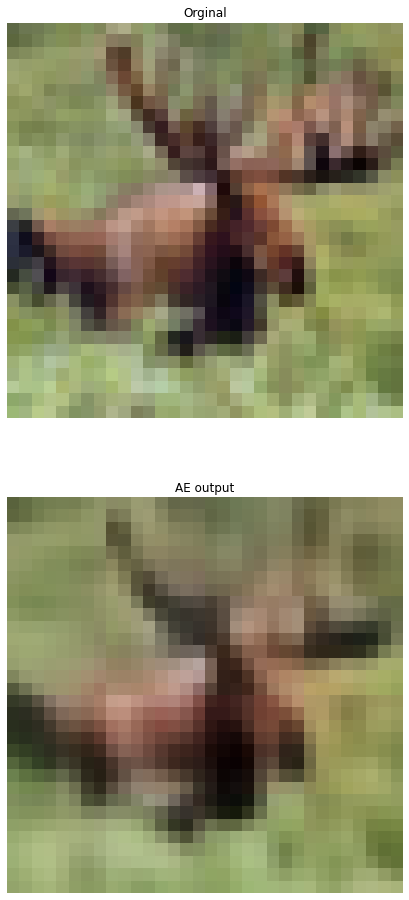

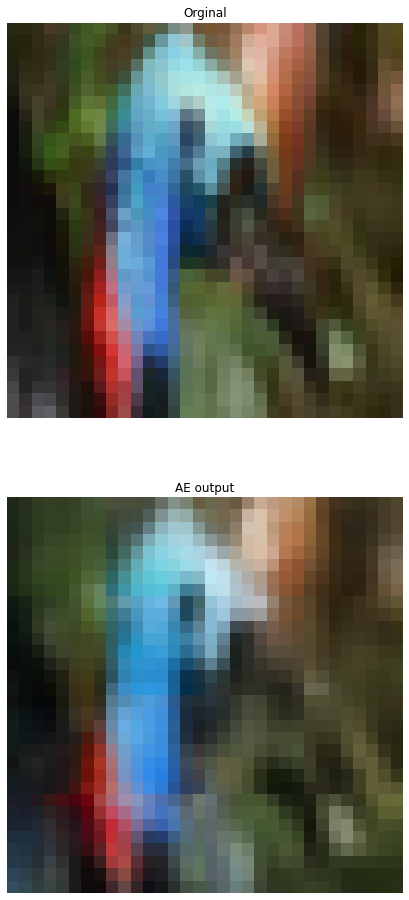

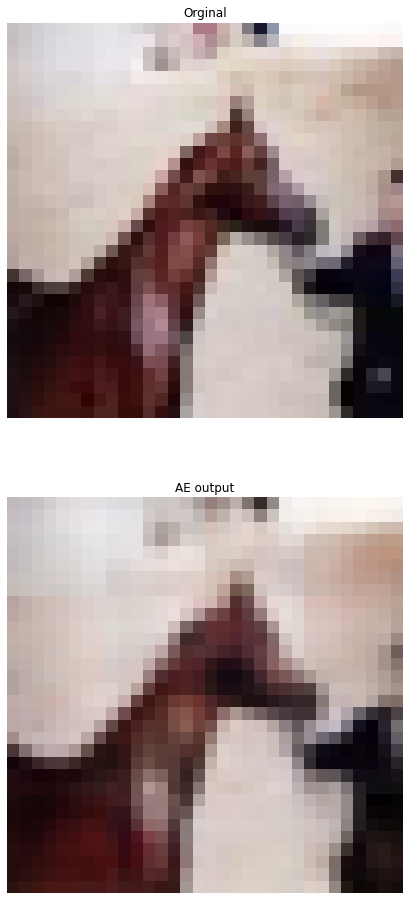

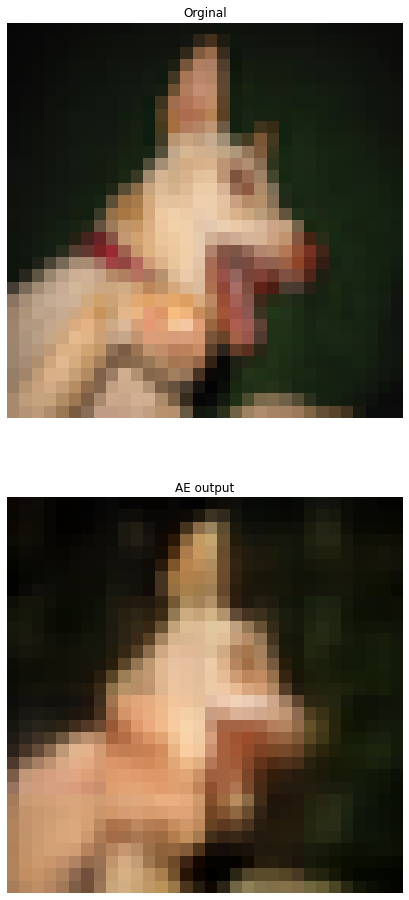

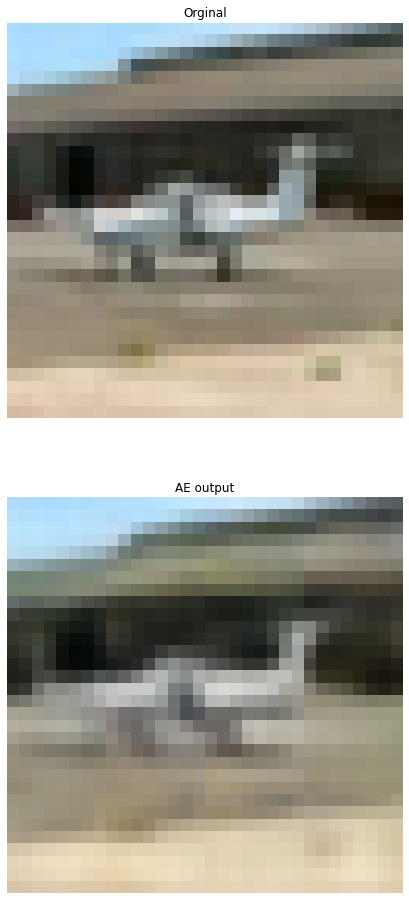

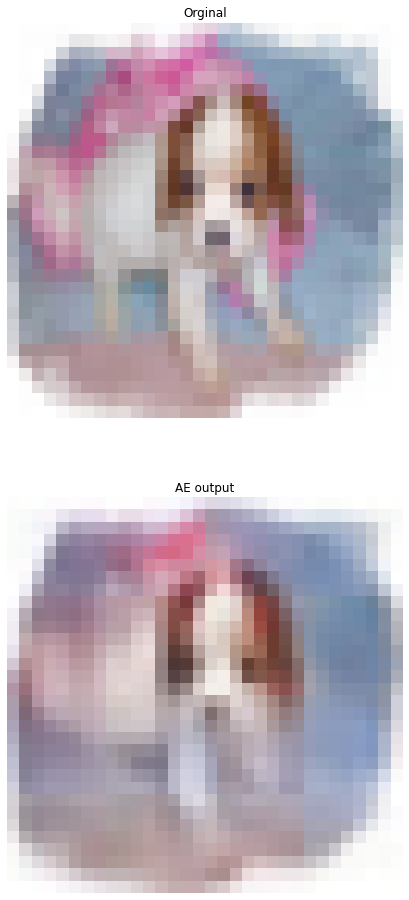

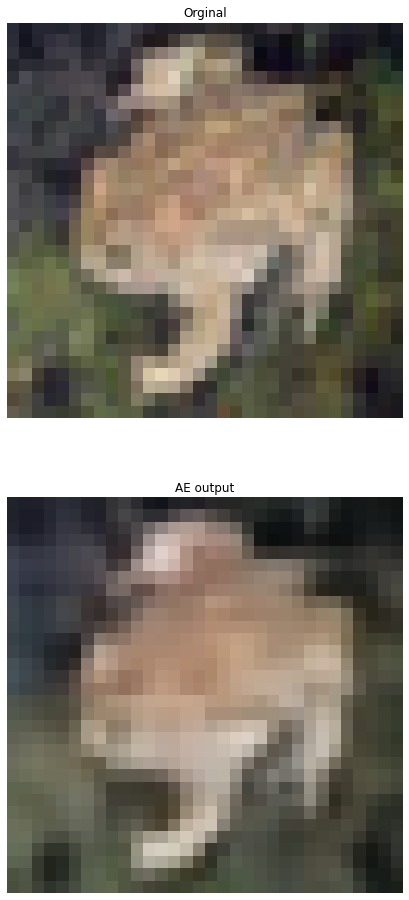

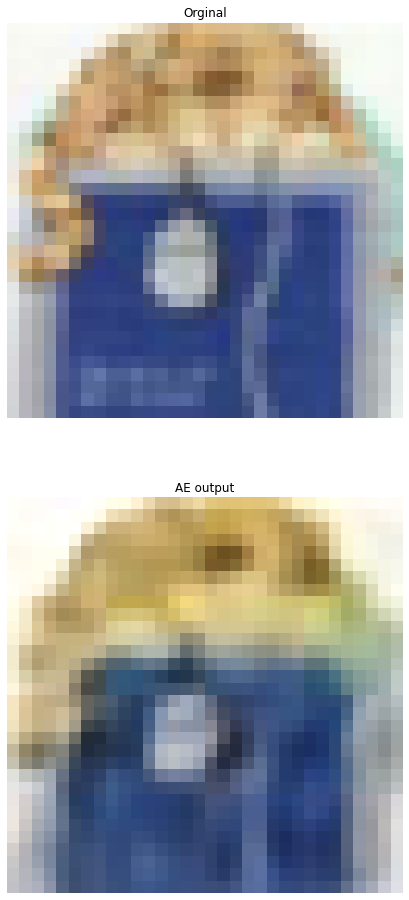

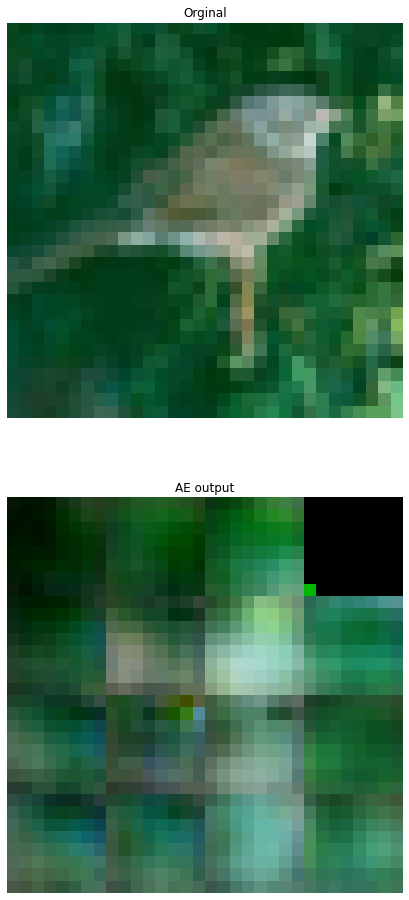

In [38]:
num_epochs = 1000
for i in range(num_epochs):
    AEModel.train()
    loss = 0.0
    for idx, (X,_) in enumerate(train_dataloader):
        X = X.to(device)
        output = AEModel(X)
        train_loss = criterion(output, X)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
        optimizer.zero_grad()
        #print(f"{idx}/{len(train_dataloader)}")

    loss = loss / len(train_dataloader)
    
    print(f"Training loss after epoch {i+151} : {loss}")

    if ((i+1)%10==0):
        torch.save(AEModel.state_dict(), "models/medium"+str(i+151)+".pth")
        with torch.no_grad():
                AEModel.eval()
                sample_img = X[2]
                print(sample_img.shape)
                sample_decoded_img = AEModel(sample_img.unsqueeze(0)).squeeze(0)

                fig = plt.figure(figsize=(16, 16))

                fig.add_subplot(2,1,1)
                plt.imshow(sample_img.permute(1, 2, 0).cpu())
                plt.axis("off")
                plt.title("Orginal")

                fig.add_subplot(2,1,2)
                plt.imshow(sample_decoded_img.permute(1, 2, 0).cpu())
                plt.axis("off")
                plt.title("AE output")



In [88]:
ana = next(iter(test_dataloader))[0]
ana = ana.to(device)

In [146]:
AEModel.load_state_dict(torch.load("models/medium210.pth"))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


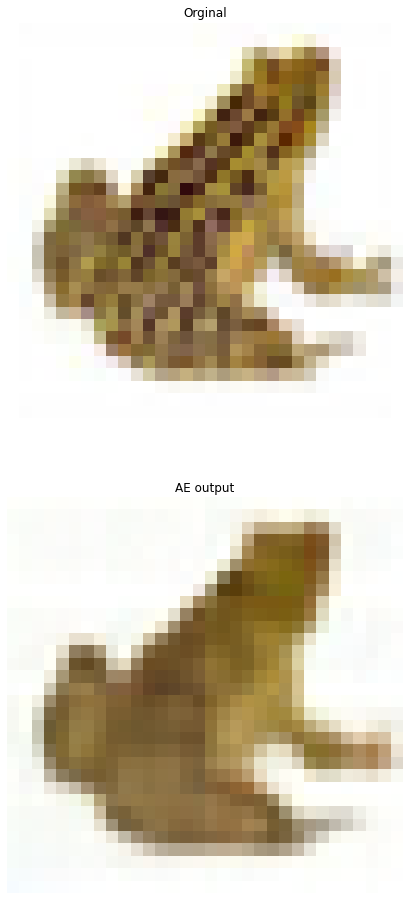

In [147]:
with torch.no_grad():
        AEModel.eval()
        sample_img = ana[13]
        print(sample_img.shape)
        sample_decoded_img = AEModel(sample_img.unsqueeze(0)).squeeze(0)

        fig = plt.figure(figsize=(16, 16))

        fig.add_subplot(2,1,1)
        plt.imshow(sample_img.permute(1, 2, 0).cpu())
        plt.axis("off")
        plt.title("Orginal")

        fig.add_subplot(2,1,2)
        plt.imshow(sample_decoded_img.permute(1, 2, 0).cpu())
        plt.axis("off")
        plt.title("AE output")



        #f, ax = plt.subplot(1,2)
        #ax[0,1].imshow(sample_img.permute(0,2,3,1).cpu())
        #ax[1,1].imshow(sample_decoded_img.permute(0,2,3,1).cpu())

In [16]:
torch.save(train_dataloader, "train_loader_512_cifar10.pth")
torch.save(test_dataloader, "test_loader_512_cifar10.pth")